# Mintun1984 for Twilite and Image-Derived Input Functions

## Setup

In [1]:
import os
import sys
import numpy as np
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))


In [2]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

from Mintun1984Context import Mintun1984Context
%matplotlib inline
# from matplotlib import pyplot as plt

In [3]:
# everything is decay corrected
kerndir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2025", "data", "kernels")
kern = os.path.join(kerndir, "kernel_hct=46.8.nii.gz")

oo1dir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2025", "data", "ses-20210421150523", "pet")
idif = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif_dynesty-Boxcar-ideal.nii.gz")
twil = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc_dynesty-RadialArtery-ideal.nii.gz")
pet = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames_timeAppend-4-ParcSchaeffer-reshape-to-schaeffer-schaeffer.nii.gz")

hodir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2025", "data", "ses-20210421152358", "pet")
ks_idif = os.path.join(oo1dir, "sub-108293_ses-20210421152358_trc-ho_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-schaeffer-Raichle1983Boxcar-main7-rc1p85-vrc1-3000-qm.nii.gz")
ks_twil = os.path.join(oo1dir, "sub-108293_ses-20210421152358_trc-ho_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-schaeffer-Raichle1983Artery-main7-rc1p85-vrc1-3000-qm.nii.gz")

codir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2025", "data", "ses-20210421144815", "pet")
v1_idif = os.path.join(codir, "sub-108293_ses-20210421144815_trc-co_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer-idif_martinv1.nii.gz")
v1_twil = os.path.join(codir, "sub-108293_ses-20210421144815_trc-co_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer-twilite_martinv1.nii.gz")

data_dict_idif = {
    "input_func_fqfn": idif,
    "tissue_fqfn": pet,
    "v1_fqfn": v1_idif,
    "ks_fqfn": ks_idif,
    "nlive": 1000,
    "tag": "playground_mintun1984_idif"
}
data_dict_twil = {
    "kernel_fqfn": kern,
    "input_func_fqfn": twil,
    "tissue_fqfn": pet,
    "v1_fqfn": v1_twil,
    "ks_fqfn": ks_twil,
    "nlive": 1000,
    "tag": "playground_mintun1984_twil"
}

truth_idif = [0.259684269,  0.661536905, 0.457123962, -3.36200600, 14.8395878, 0.00890060107]
truth_twil = [0.41378011, 0.63554847, 0.471029, 7.29076149, 11.11659621, 0.02739821]
mm_idif = Mintun1984Context(data_dict_idif)
mm_twil = Mintun1984Context(data_dict_twil)

parc_index = 9

## Inspect Mintun1984Context twil

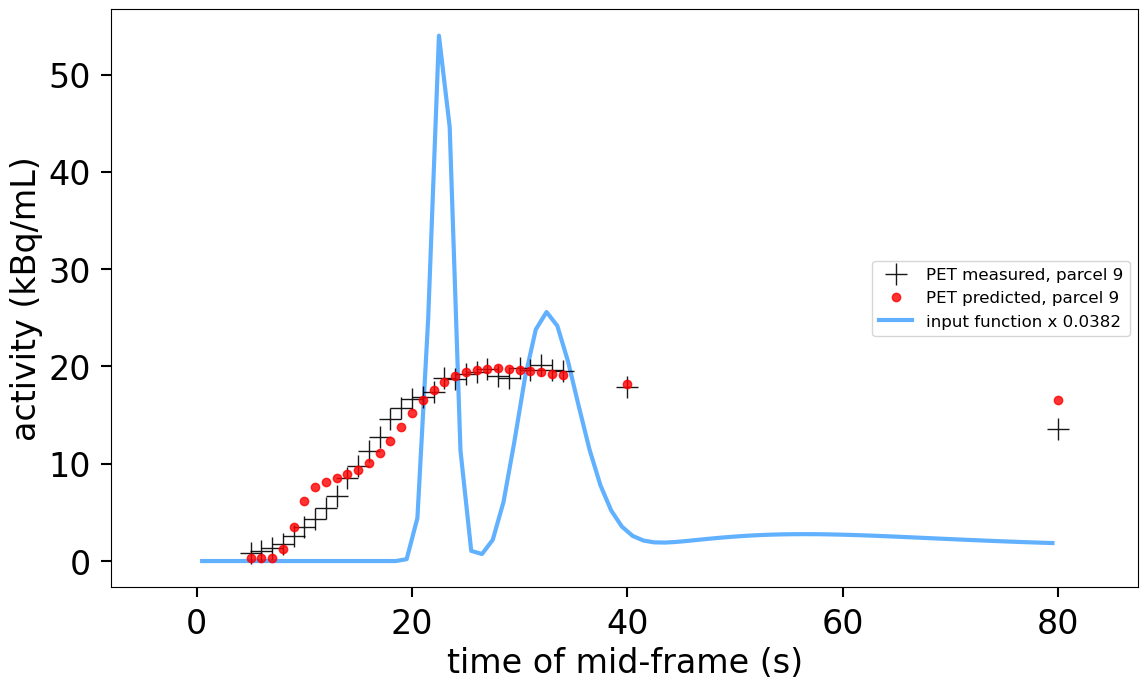

In [4]:
mm_twil.plotting.truths_plot(truths=truth_twil, parc_index=parc_index)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [5]:
# de novo, thalamus ~ 6, 25
res_twil = mm_twil.solver.run_nested(print_progress=True, parc_index=range(parc_index + 1))

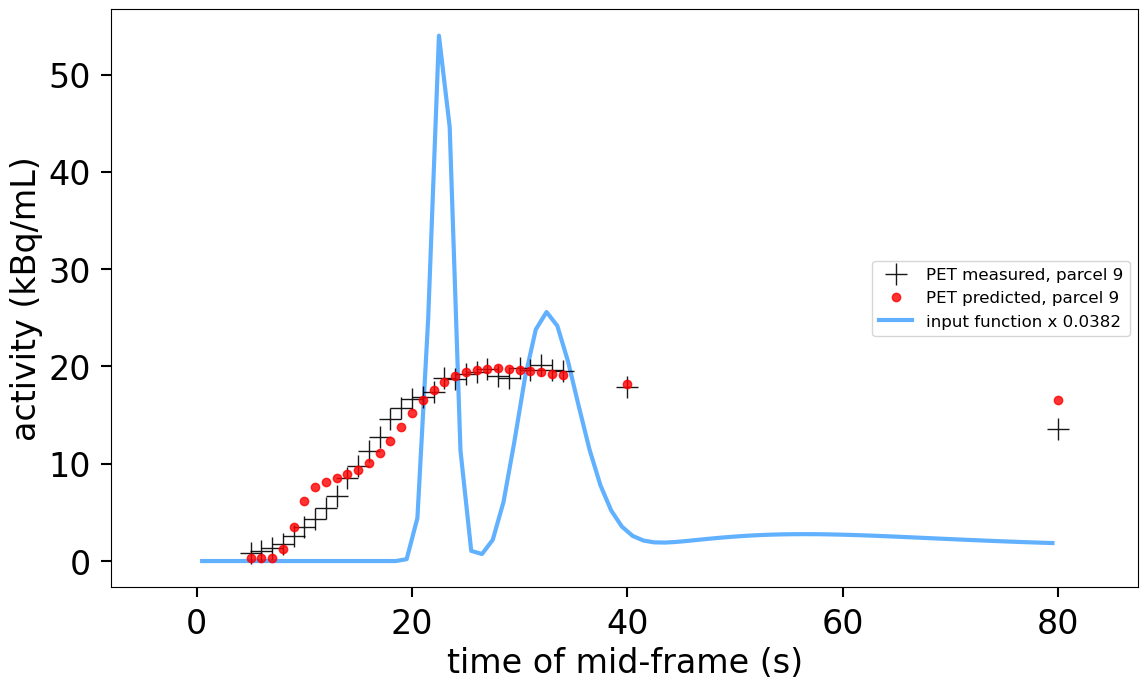

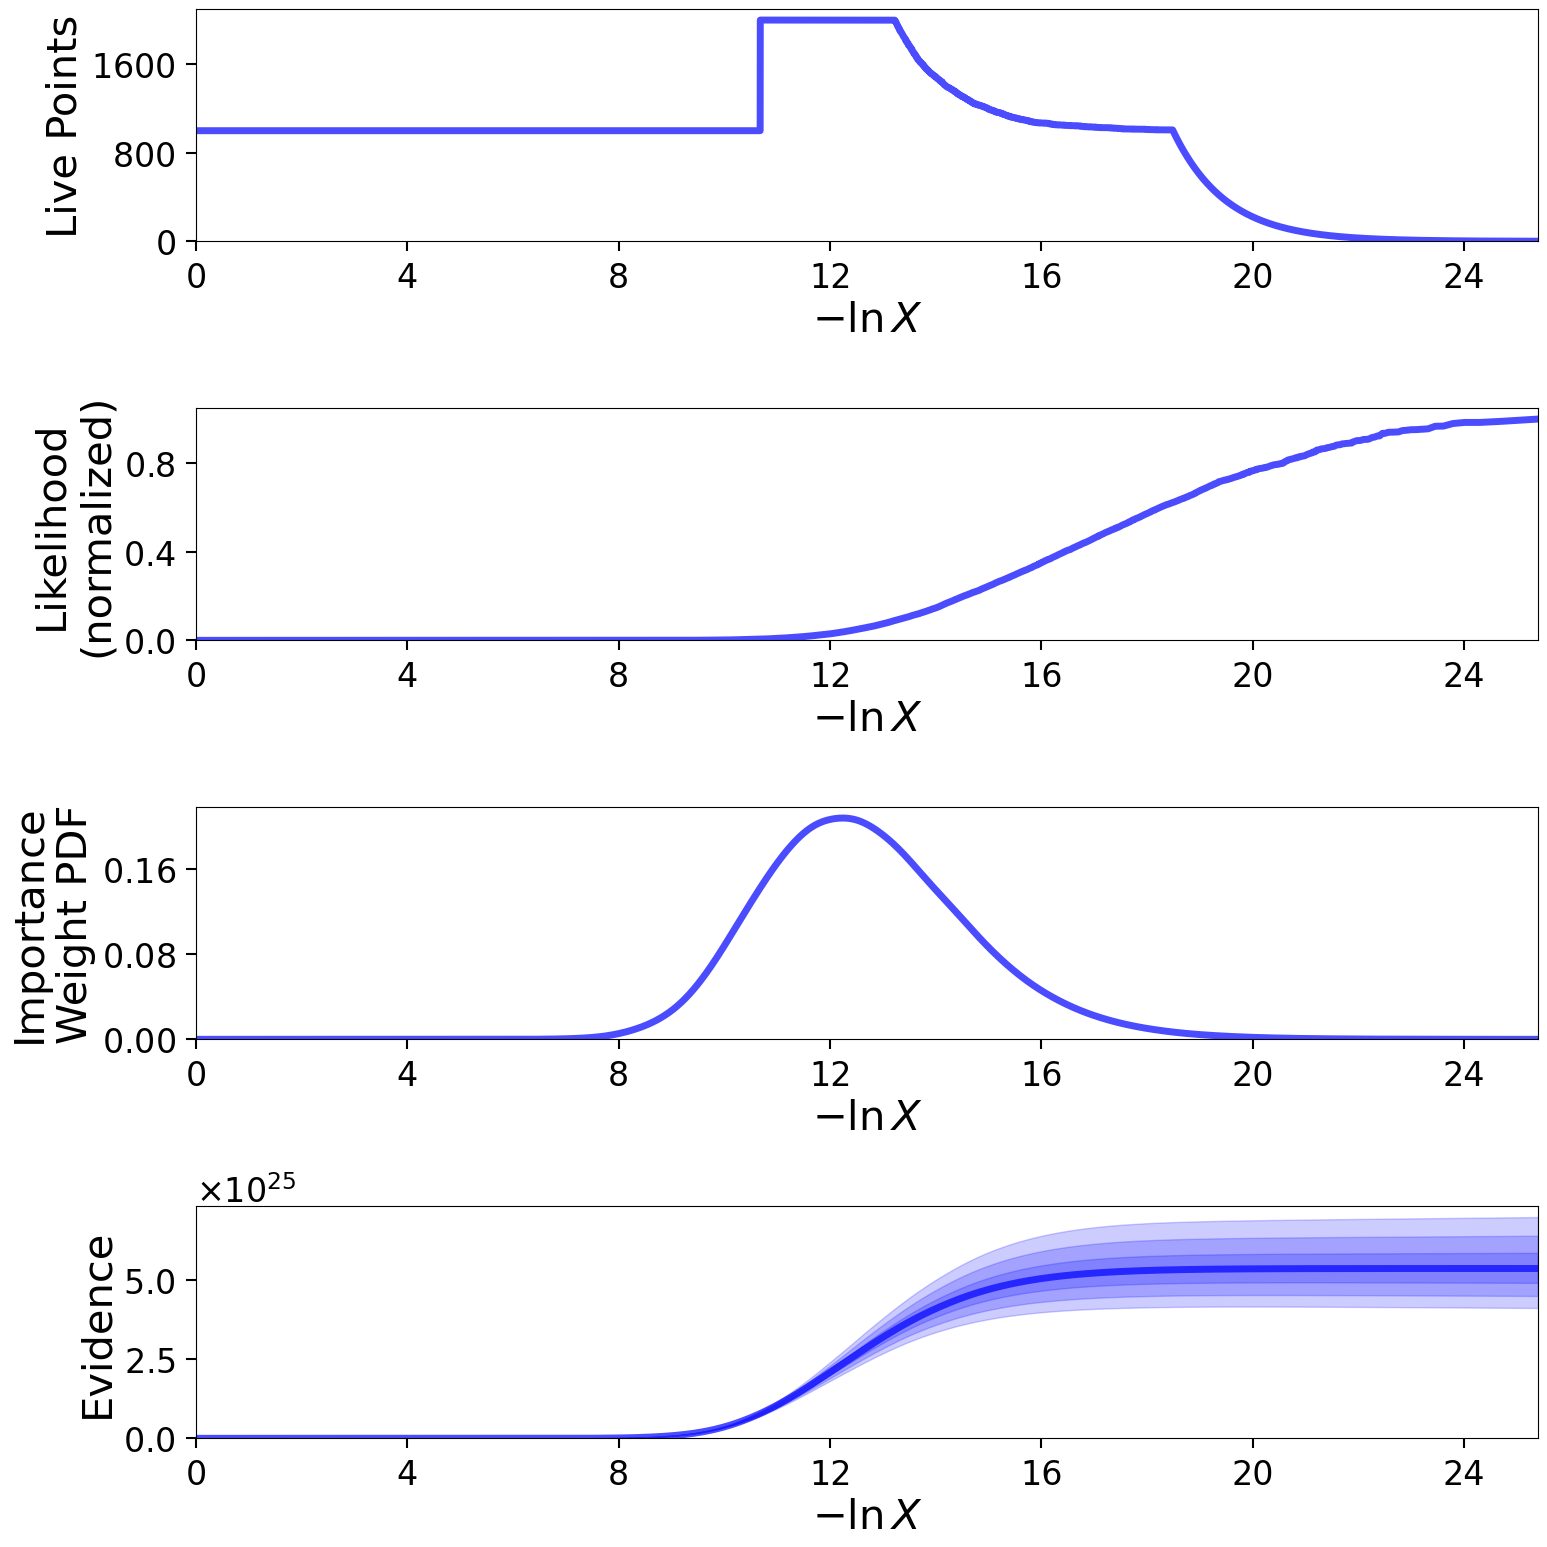

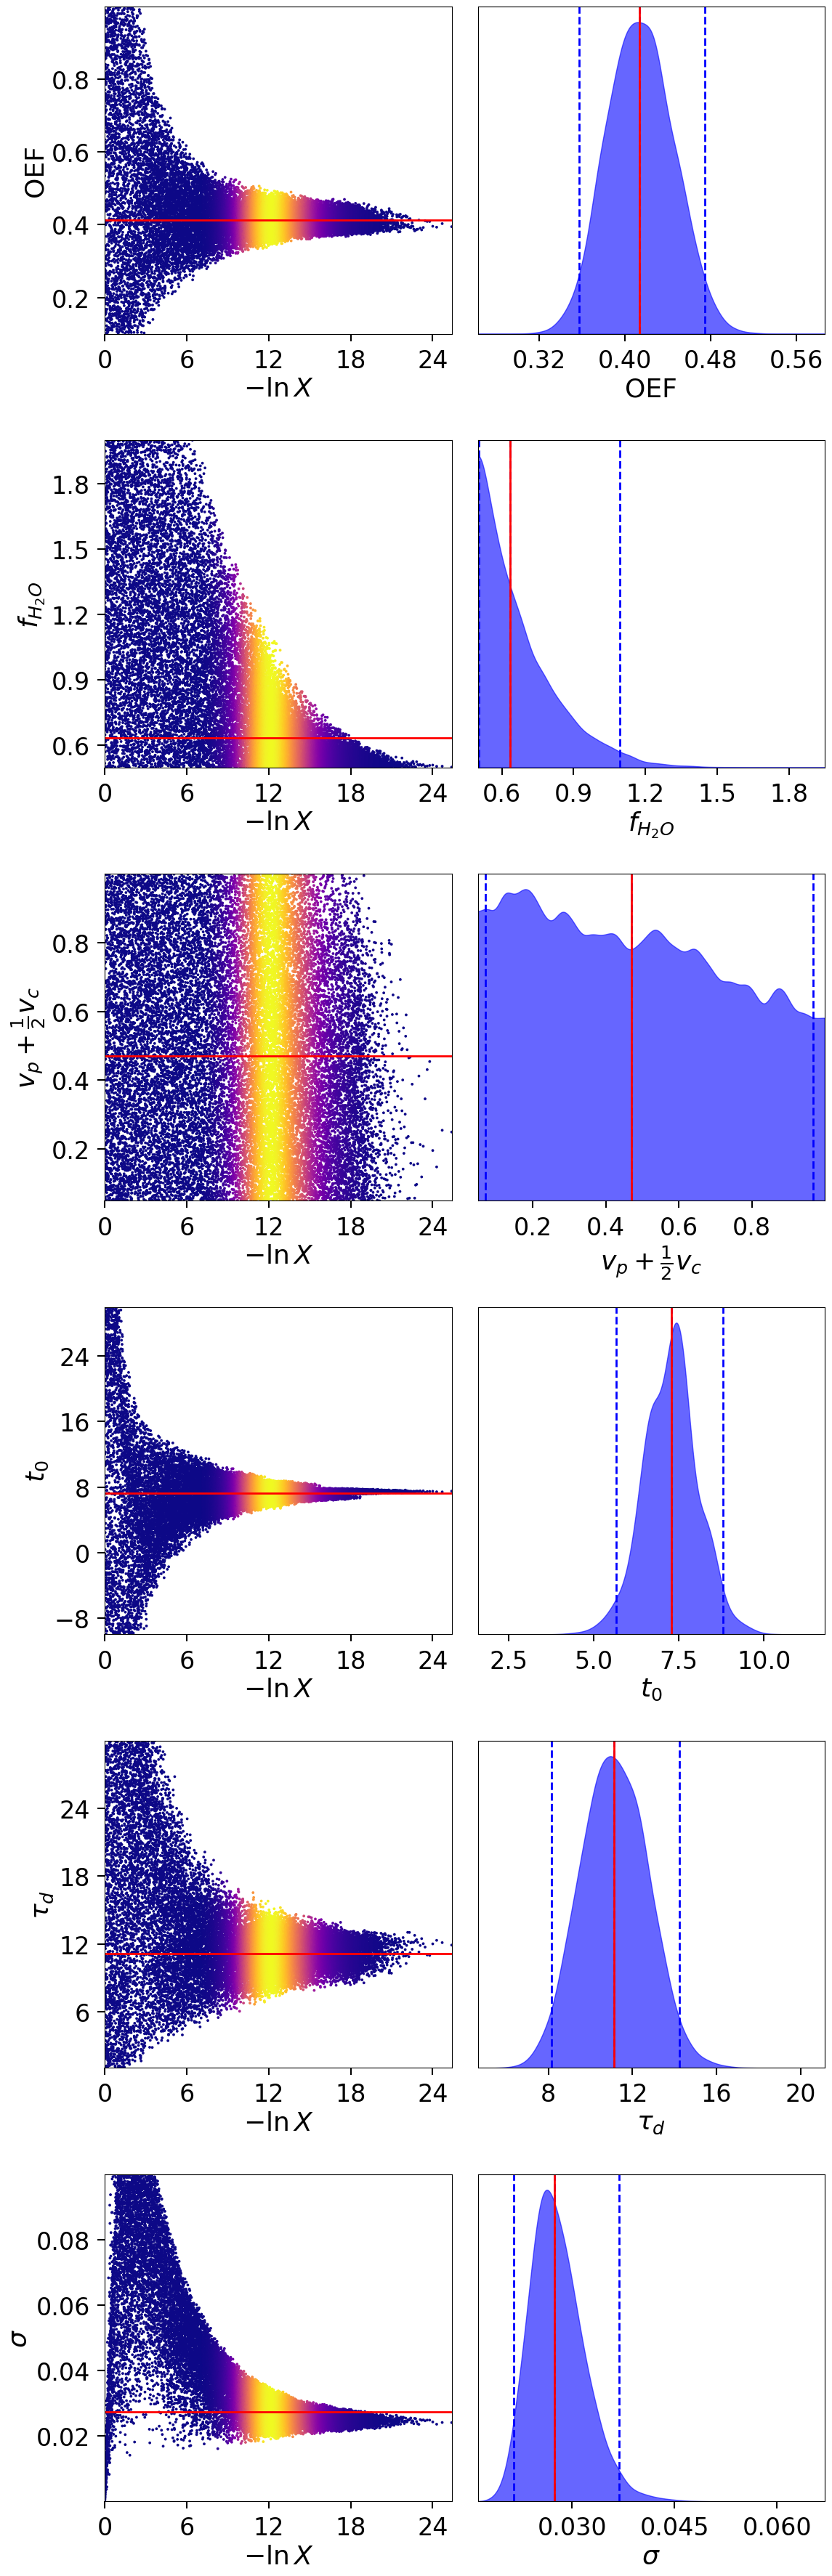

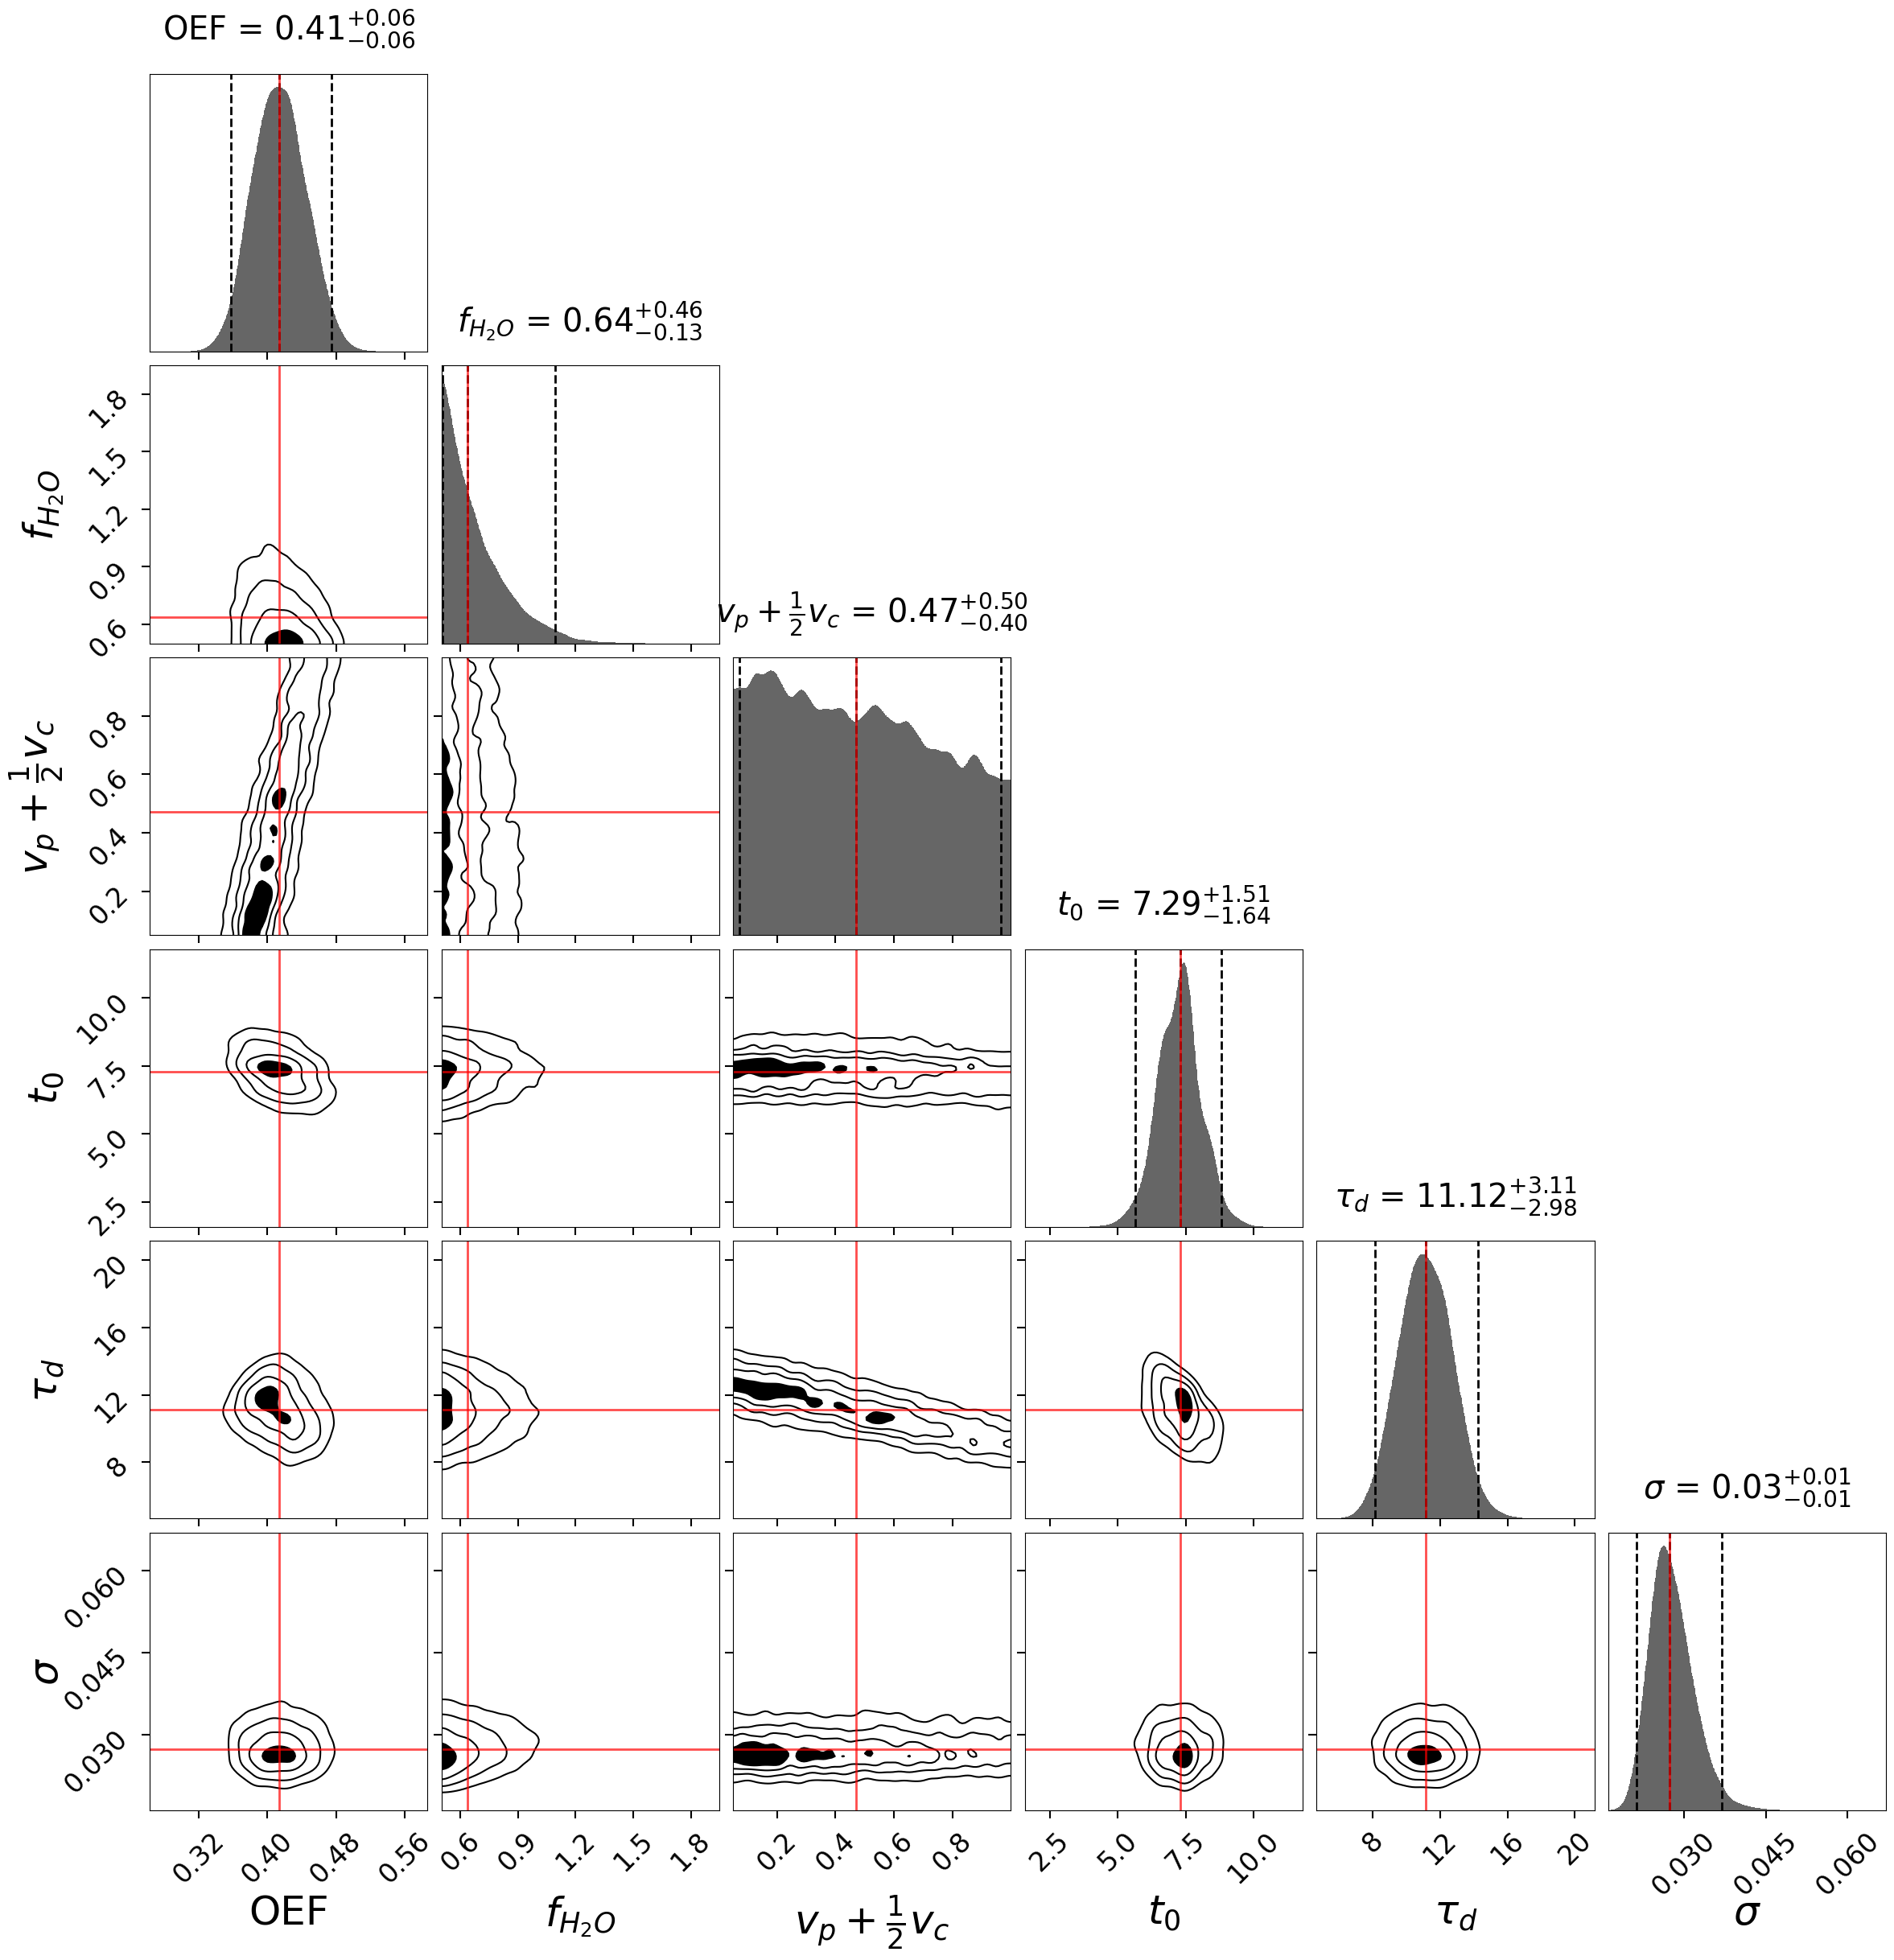

In [6]:
mm_twil.plotting.results_plot(tag="playground_mintun1984_twil", parc_index=parc_index)

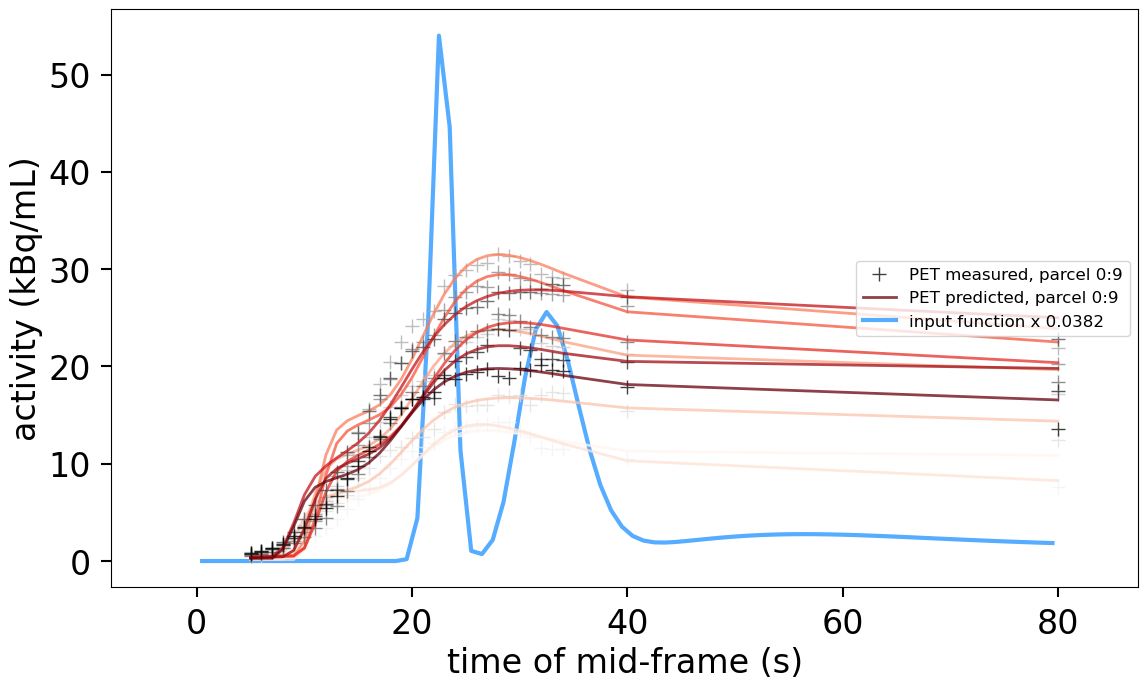

In [7]:
mm_twil.plotting.parcs_plot()

## Inspect Mintun1984Context idif

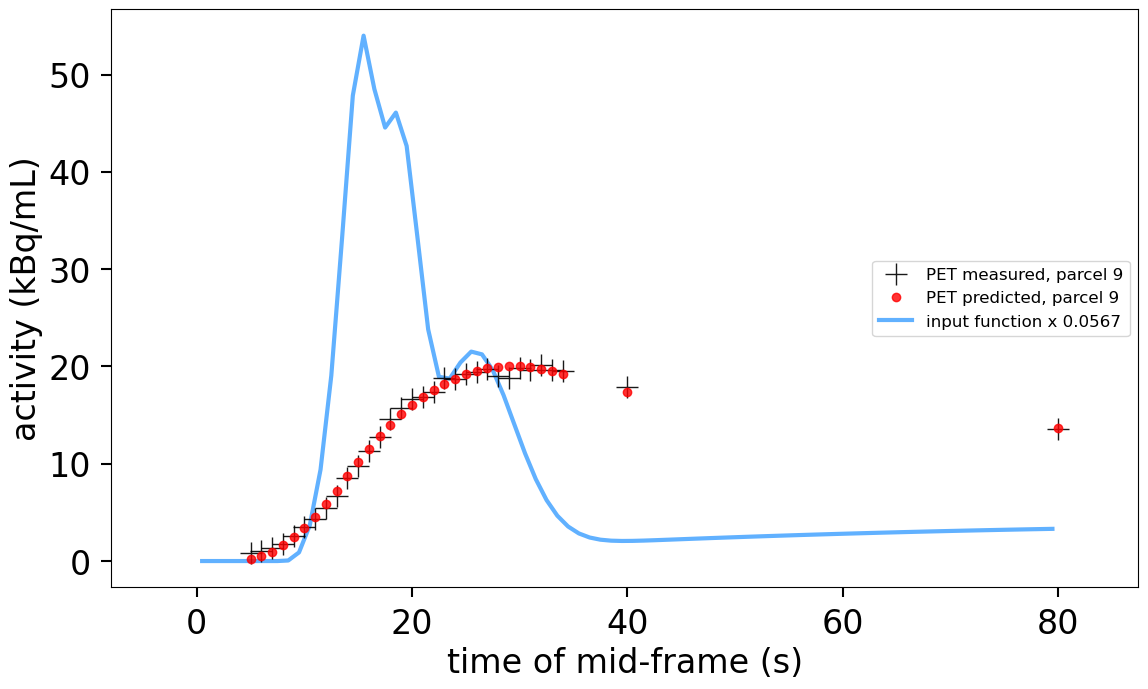

In [8]:
mm_idif.plotting.truths_plot(truths=truth_idif, parc_index=parc_index)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [9]:
# de novo, thalamus ~ 6, 25
res_idif = mm_idif.solver.run_nested(print_progress=True, parc_index=range(parc_index + 1))

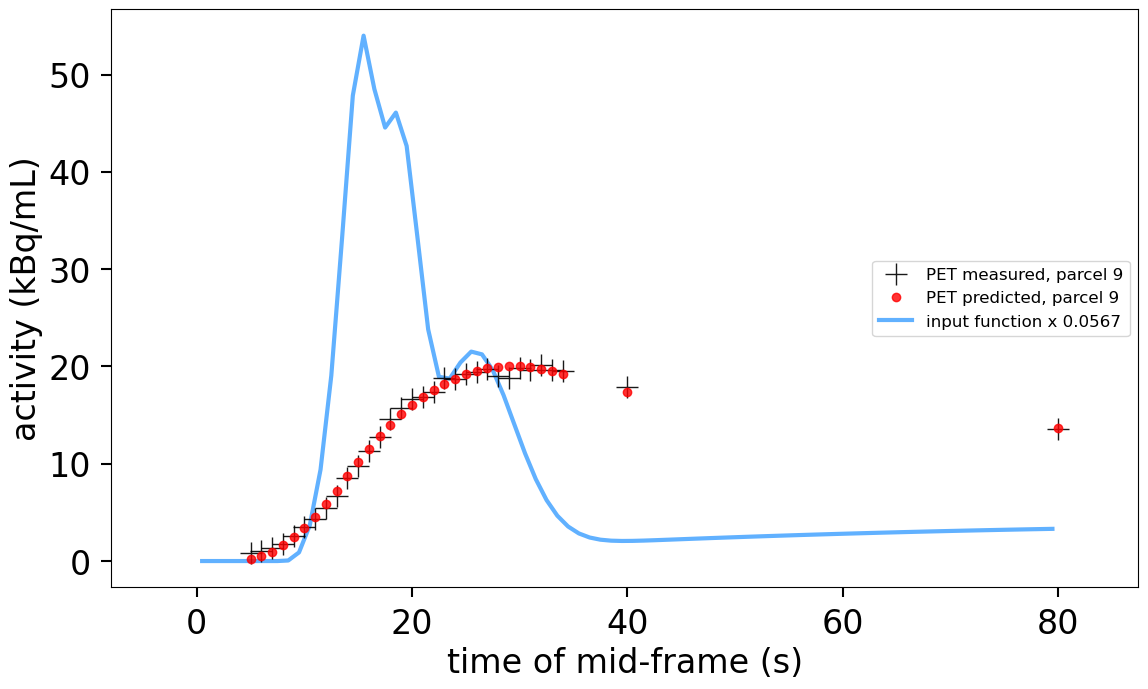

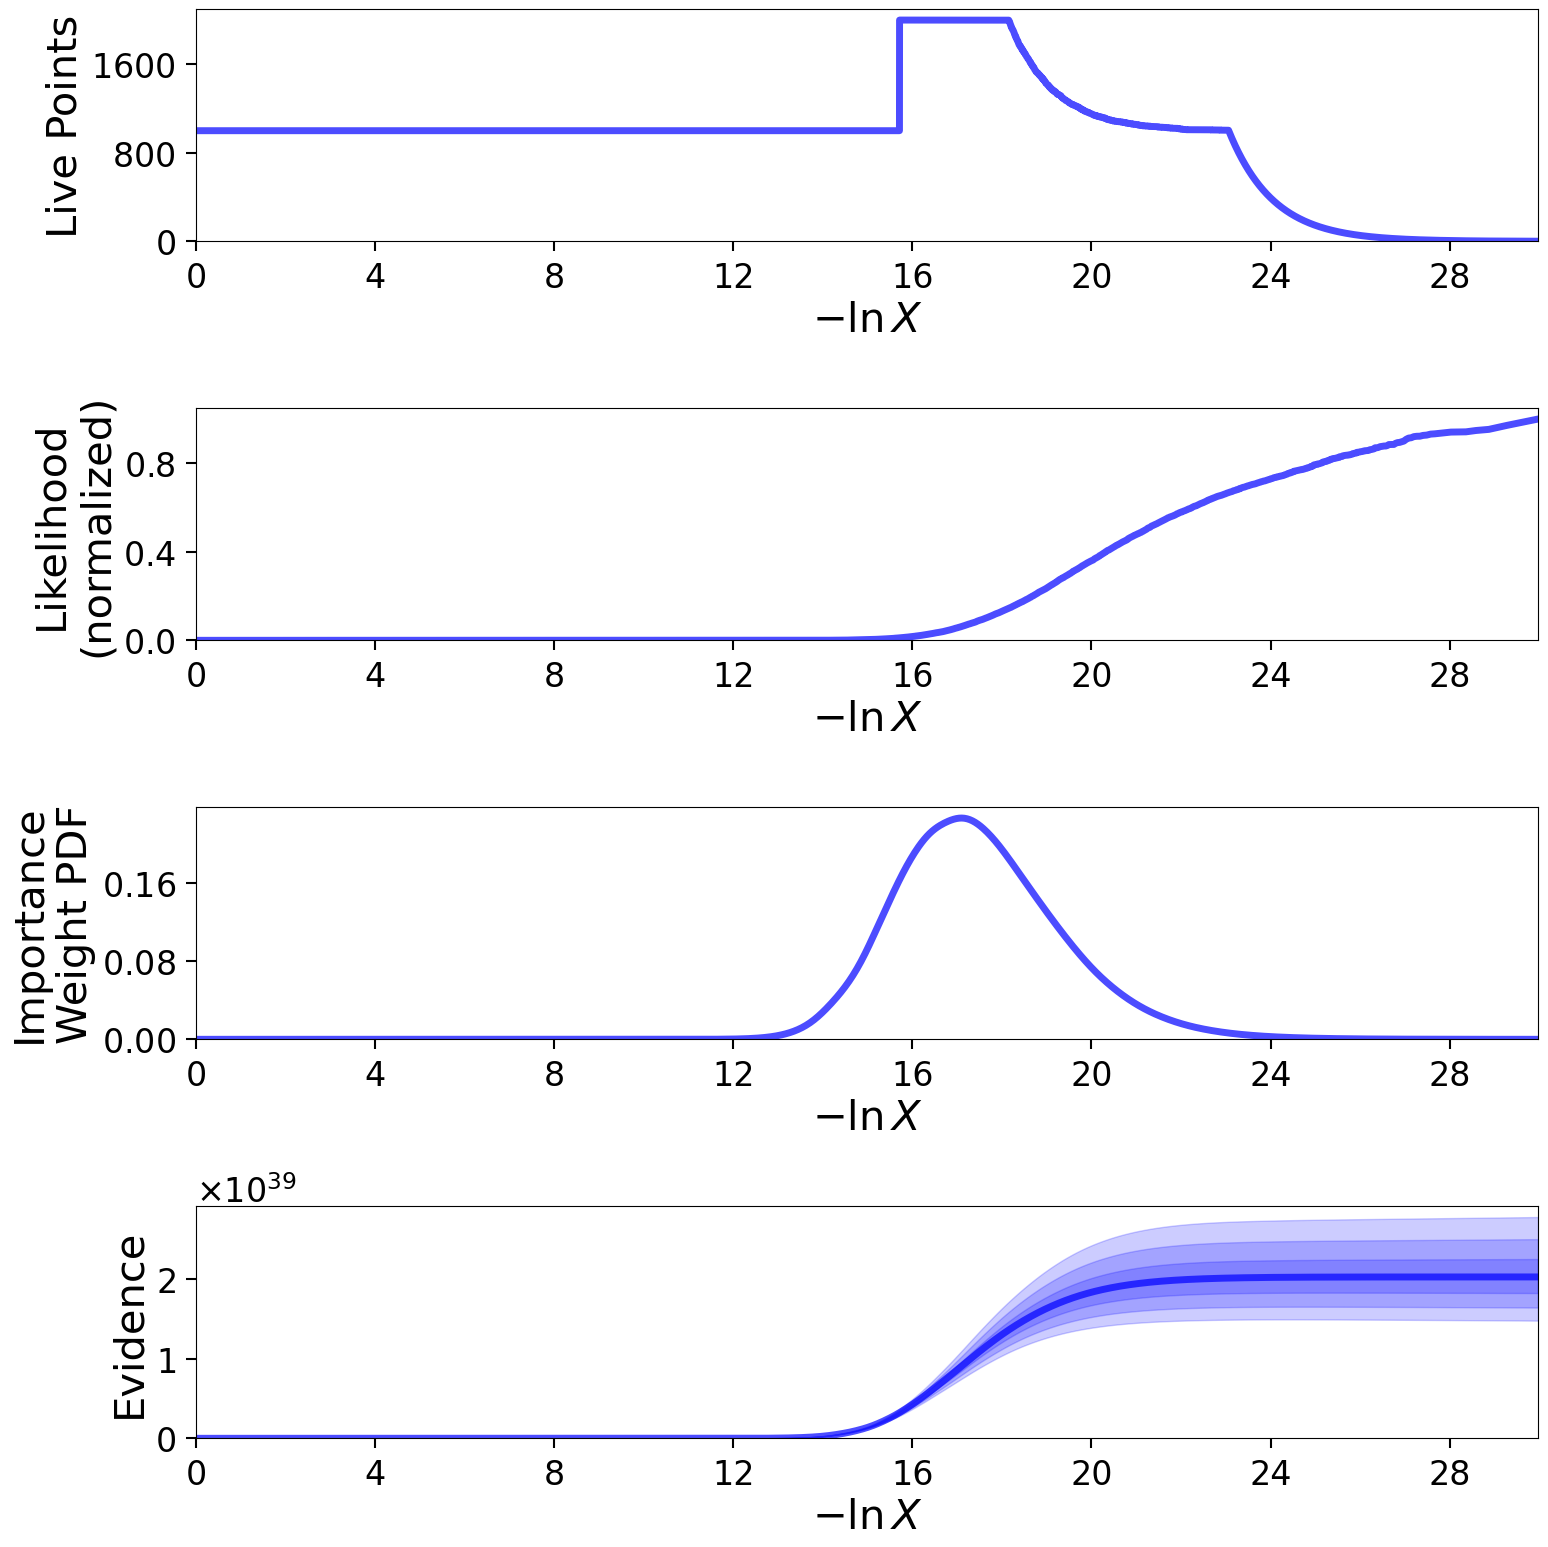

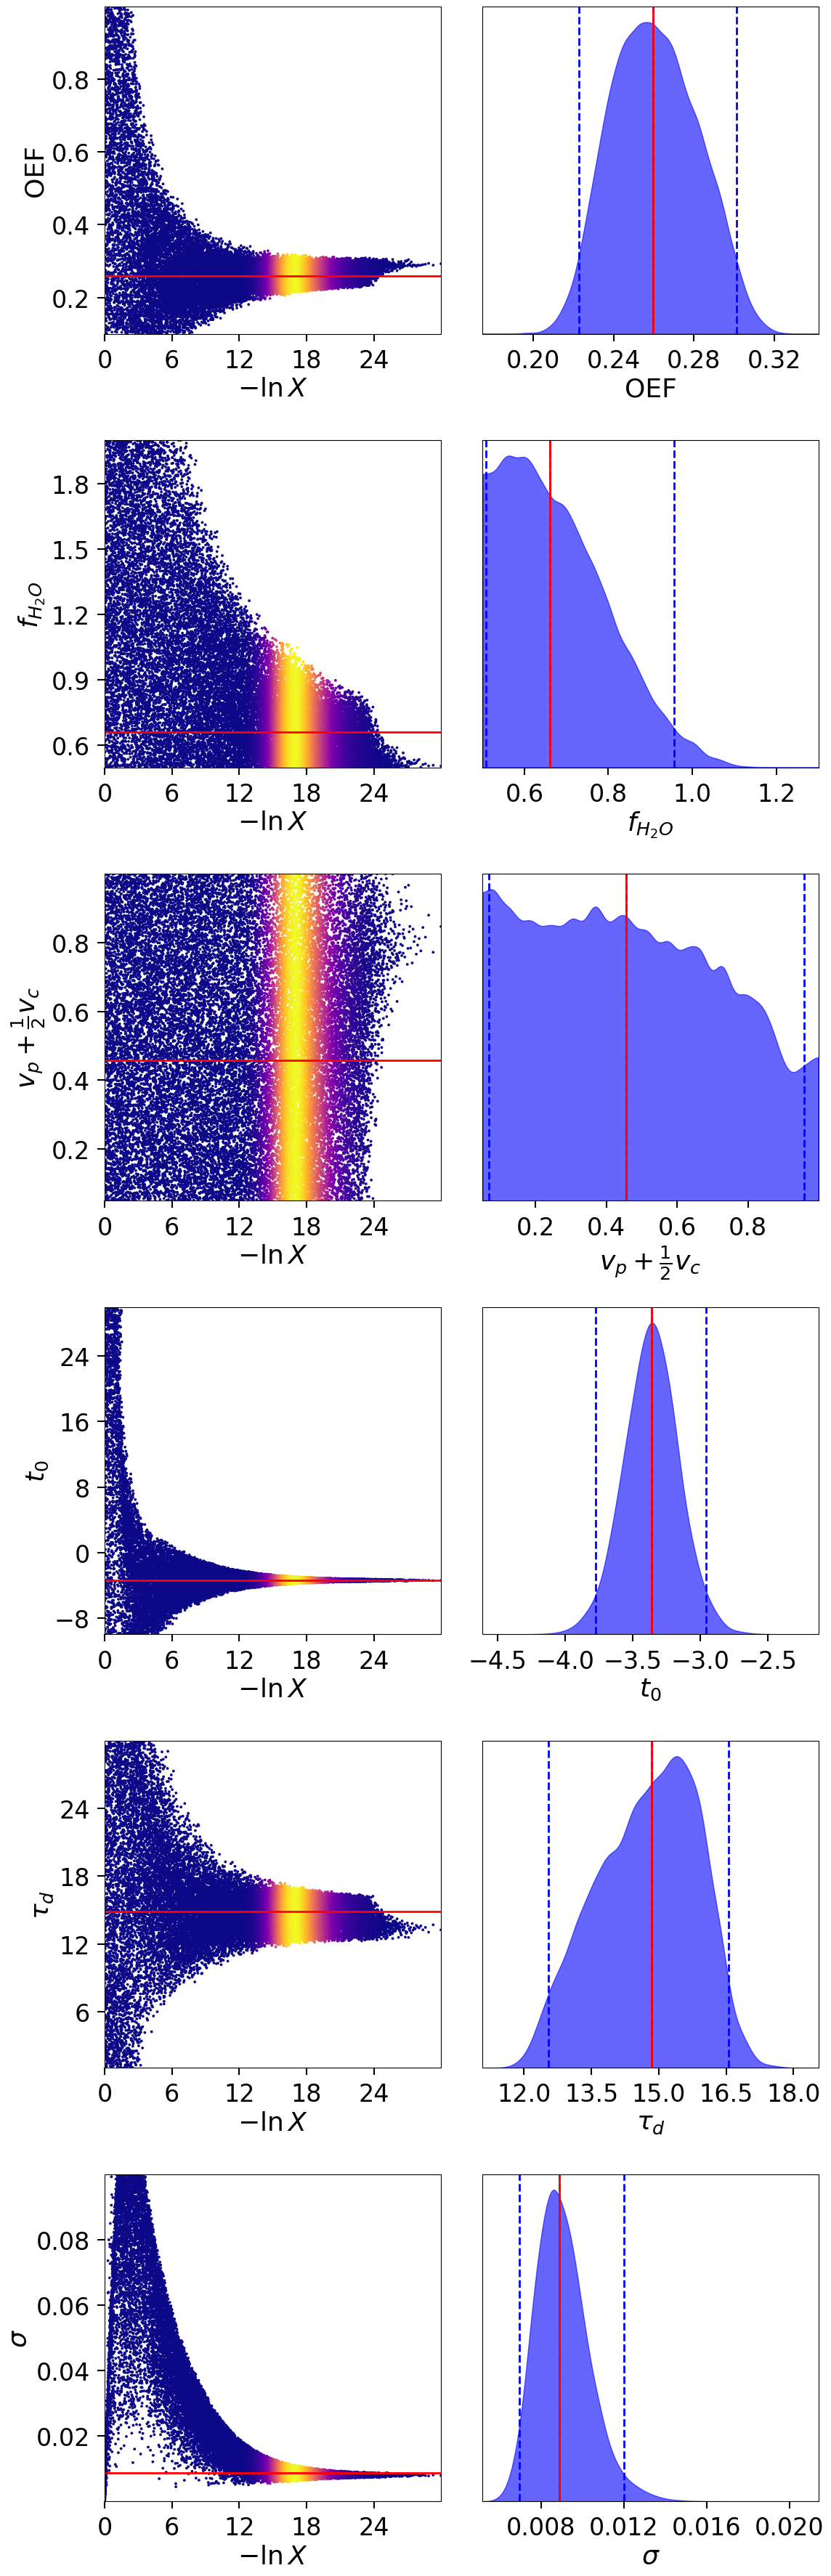

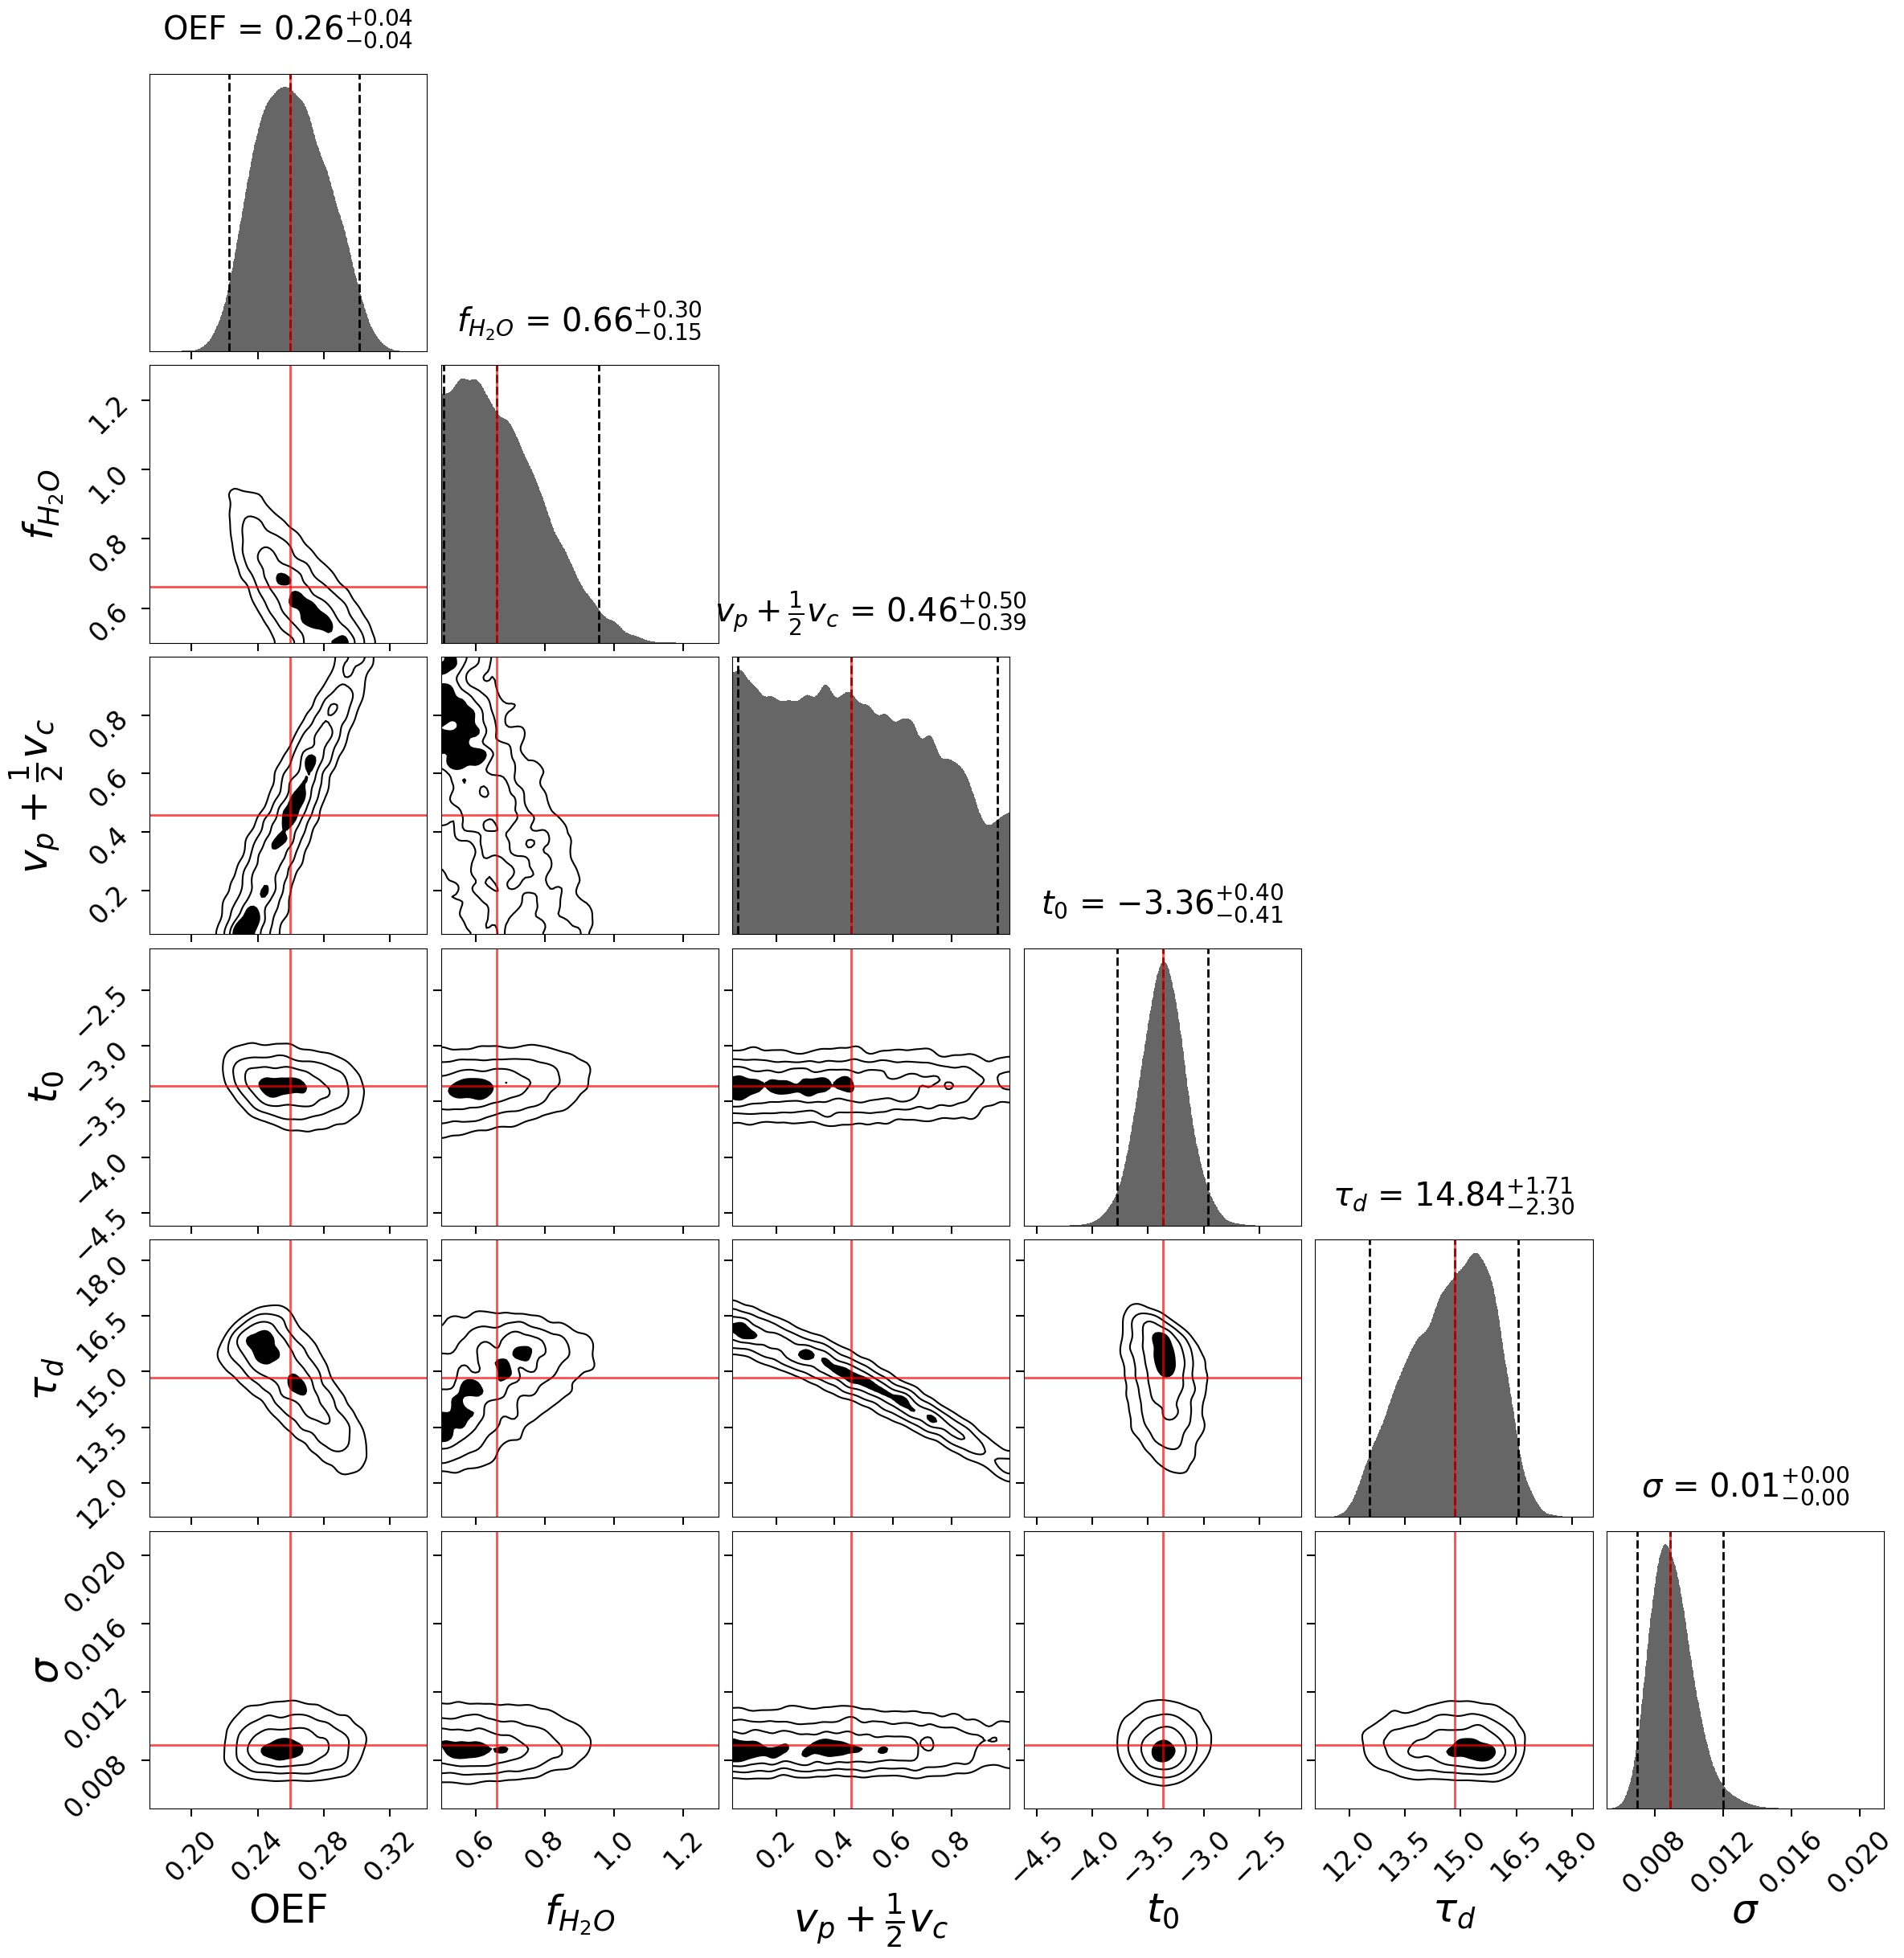

In [10]:
mm_idif.plotting.results_plot(tag="playground_mintun1984_idif", parc_index=parc_index)

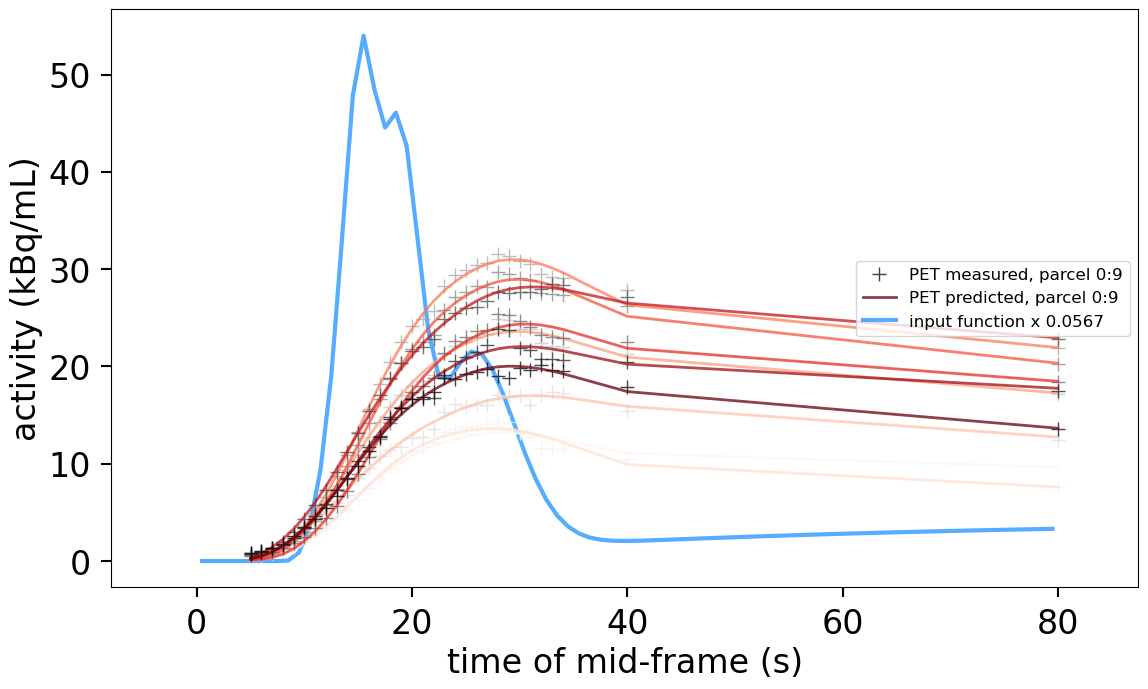

In [11]:
mm_idif.plotting.parcs_plot()

In [12]:
mm_twil.data.print_truths()
mm_idif.data.print_truths()



=============================== Truths ===============================
Parameter                        Value
----------------------------------------

Row 0:
OEF                            0.41849
$f_{H_2O}$                     0.69952
$v_p + \frac{1}{2} v_c$        0.34756
$t_0$                          8.39117
$\tau_d$                      10.85743
$\sigma$                       0.01731

Row 1:
OEF                            0.43487
$f_{H_2O}$                     0.90852
$v_p + \frac{1}{2} v_c$        0.36635
$t_0$                          9.12522
$\tau_d$                      11.39326
$\sigma$                       0.02095

Row 2:
OEF                            0.38067
$f_{H_2O}$                     0.59507
$v_p + \frac{1}{2} v_c$        0.55785
$t_0$                          7.55903
$\tau_d$                      11.64931
$\sigma$                       0.01837

Row 3:
OEF                            0.45202
$f_{H_2O}$                     0.64916
$v_p + \frac{1}{2} v_c$        0.41

In [13]:
pprint(mm_twil.solver.truths)
pprint(mm_idif.solver.truths)

array([[ 0.41848887,  0.69951609,  0.34756071,  8.39117469, 10.85743072,
         0.01731386],
       [ 0.43487081,  0.90851955,  0.36635009,  9.1252175 , 11.39326429,
         0.0209538 ],
       [ 0.38067159,  0.59506793,  0.55784613,  7.55903365, 11.64931334,
         0.01836863],
       [ 0.4520154 ,  0.64916451,  0.41369738,  8.63103402,  9.25288209,
         0.02761695],
       [ 0.45286033,  0.76289385,  0.52752469,  9.32342897, 10.18727211,
         0.03944792],
       [ 0.42755521,  0.69386706,  0.48753438,  9.64536038,  8.91433233,
         0.0354378 ],
       [ 0.48770232,  0.69038099,  0.45668601,  9.44228913,  8.33406133,
         0.02778045],
       [ 0.51350925,  0.65424329,  0.72802868,  7.30218424,  8.89139581,
         0.02821614],
       [ 0.50725666,  0.66152184,  0.38406986,  8.5487955 ,  7.8048917 ,
         0.02540318],
       [ 0.41378011,  0.63554847,  0.471029  ,  7.29076149, 11.11659621,
         0.02739821]])
array([[ 2.70662733e-01,  9.26643414e-01,  8.0325